In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784, )))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [4]:
from keras import optimizers

In [5]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss='mse',
              metrics=['accuracy'])

In [11]:
#model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

# 电影评论分类

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
len(train_data[0])

218

In [5]:
len(train_data[1])

189

In [6]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [7]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [8]:
[max(sequence) for sequence in train_data]

[7486,
 9837,
 6905,
 9941,
 7224,
 7982,
 9363,
 9820,
 7612,
 8419,
 8914,
 7412,
 9667,
 9106,
 6640,
 9671,
 9263,
 9935,
 8742,
 9580,
 9859,
 8793,
 7609,
 9462,
 9075,
 8614,
 8887,
 5898,
 9637,
 9212,
 9771,
 9209,
 8257,
 7778,
 9877,
 9753,
 7015,
 9902,
 8427,
 8867,
 8406,
 9579,
 9529,
 7056,
 7023,
 9922,
 5811,
 9124,
 9910,
 8795,
 7799,
 7146,
 9978,
 7999,
 9565,
 9731,
 9095,
 9888,
 5247,
 9655,
 4852,
 9939,
 9018,
 9885,
 7239,
 9636,
 9389,
 9561,
 9673,
 9147,
 9956,
 9448,
 8520,
 9360,
 9765,
 9025,
 9928,
 8352,
 9960,
 7320,
 8318,
 7881,
 9715,
 9851,
 9266,
 9055,
 8894,
 9719,
 9271,
 7311,
 8791,
 9918,
 9486,
 9867,
 9283,
 7707,
 9133,
 9055,
 9978,
 8013,
 8448,
 8700,
 9906,
 7517,
 9962,
 6266,
 6903,
 9815,
 9976,
 9273,
 9413,
 8931,
 8631,
 9685,
 9419,
 9964,
 7361,
 9052,
 9482,
 9643,
 9865,
 9819,
 7181,
 2775,
 9709,
 9977,
 8916,
 4431,
 9700,
 6532,
 8836,
 9926,
 6781,
 7614,
 5418,
 8881,
 9841,
 9615,
 9072,
 9831,
 6891,
 8827,
 9019,

In [9]:
word_index = imdb.get_word_index()
word_index

{'jollies': 45612,
 'bedtime': 18429,
 'uprosing': 60711,
 'embarrassed': 2939,
 "'american": 24162,
 'sino': 87082,
 'tilse': 85036,
 "celeste's": 19404,
 '90': 1549,
 'ansley': 53928,
 'smartly': 15632,
 'hysterical': 3788,
 'formosa': 39385,
 'tear': 3322,
 'cranny': 44633,
 'unmercilessly': 59962,
 'unpredictably': 78912,
 "presson's": 84684,
 "logan's": 12626,
 '2005': 3346,
 'nc': 10735,
 'griped': 56543,
 'shakespeareans': 59540,
 'unnuanced': 75421,
 'molten': 33883,
 "power'": 37475,
 'apprehensions': 69440,
 'pure': 1047,
 "council's": 44281,
 'squirtguns': 85580,
 "intuition'": 53984,
 'mices': 42255,
 'overglamorize': 81246,
 'veblen': 56192,
 'tvg': 82776,
 'hoping': 1380,
 'typist': 31368,
 'congratulates': 85849,
 'alfonso': 17611,
 'rohan': 46324,
 'aftra': 67723,
 'colorized': 21942,
 'alita': 82316,
 'andrez': 74057,
 'speak': 1125,
 'guardian': 7435,
 'cleef': 22169,
 "malick's": 50615,
 'tremaine': 20434,
 'submitting': 22074,
 'maddeningly': 24558,
 'squeaking': 40

In [12]:
#word_index.items()

In [13]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'he',
 27: 'be',
 28: 'one',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'who',
 35: 'so',
 36: 'from',
 37: 'like',
 38: 'her',
 39: 'or',
 40: 'just',
 41: 'about',
 42: "it's",
 43: 'out',
 44: 'has',
 45: 'if',
 46: 'some',
 47: 'there',
 48: 'what',
 49: 'good',
 50: 'more',
 51: 'when',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'she',
 57: 'even',
 58: 'my',
 59: 'would',
 60: 'which',
 61: 'only',
 62: 'story',
 63: 'really',
 64: 'see',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'were',
 69: 'me',
 70: 'well',
 71: 'than',
 72: 'we',
 73: 'much',
 74: 'been',
 75: 'bad',
 76: 'get',
 77: 'will',
 78: 'do',
 79: 'also',
 80: 'into',
 81: 'people',
 82: 'other',
 8

In [14]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review   #Python 字典 get() 函数返回指定键的值，如果值不在字典中返回默认值。dict.get(key, default=None)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
import numpy as np

In [16]:
def vectorize_sequences(sequences, dimension=10000):
    import numpy as np
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [17]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train[0][:100]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.])

In [21]:
train_data.shape

(25000,)

In [22]:
x_train.shape

(25000, 10000)

In [20]:
train_labels.shape

(25000,)

In [26]:
train_labels[0]

1

In [44]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [25]:
y_train.shape

(25000,)

In [27]:
y_train[0]

1.0

In [29]:
from keras import models
from keras import layers

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 353us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 4s 237us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3088 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 4s 269us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 4s 299us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3086 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

In [38]:
history_dict = history.history
history_dict

{'acc': [0.7953333332697551,
  0.9046000000317892,
  0.9285999999364217,
  0.9432666668891907,
  0.9542666663805643,
  0.9653333333969116,
  0.9708666668256124,
  0.9764000001271566,
  0.9819999999682109,
  0.9849999999682109,
  0.9885333335876465,
  0.9913333335876465,
  0.9939333333333333,
  0.9948666666666667,
  0.9973333333333333,
  0.9983333333333333,
  0.9971333333333333,
  0.9996,
  0.9978666666666667,
  0.9998],
 'loss': [0.49761171565055845,
  0.2957423823515574,
  0.2159841989437739,
  0.1741682304461797,
  0.14144997352759042,
  0.11426639863650004,
  0.09700234038829804,
  0.08026682478586833,
  0.06575351929267248,
  0.05533990733226141,
  0.04543703057169914,
  0.038597138969103495,
  0.02967165371576945,
  0.024313847859203815,
  0.018485350629190603,
  0.015407615023851394,
  0.015915671178201835,
  0.007834523179133733,
  0.011288357791056235,
  0.0043279735642174876],
 'val_acc': [0.8721999999046326,
  0.8910000004768371,
  0.8713000001907348,
  0.8839000000953674,
  

In [39]:
history_dict.keys()

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])

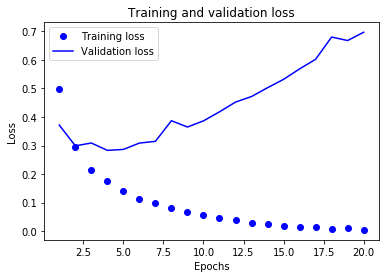

In [41]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

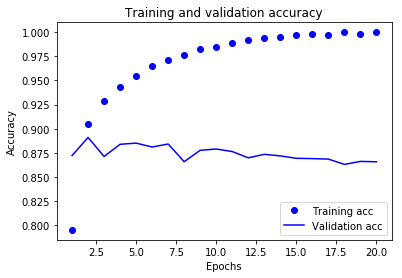

In [42]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.show()

In [45]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.4584 - acc: 0.8133: 1s - loss: 0.5421 - - ETA: 0s - loss: 0.4727 - acc: 0.
Epoch 2/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2630 - acc: 0.9095: 0s - loss: 0.2650 - acc: 0
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2005 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 3s 110us/step


In [46]:
results

[0.2988449817276001, 0.88256]

In [47]:
model.predict(x_test)

array([[0.21053143],
       [0.99948835],
       [0.92899966],
       ...,
       [0.1423399 ],
       [0.10365892],
       [0.7072802 ]], dtype=float32)

In [50]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.4536 - acc: 0.8079 1s - loss: 
Epoch 2/4
25000/25000 [==============================] - ETA: 0s - loss: 0.2445 - acc: 0.908 - 2s 97us/step - loss: 0.2449 - acc: 0.9078
Epoch 3/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.1928 - acc: 0.9272
Epoch 4/4
25000/25000 [==============================] - 3s 112us/step


In [51]:
results

[0.37407534100055695, 0.86364]